In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
WINDOWS = 10 
def country_plot(x, y1, y2, y3, country):
    confirmed_avg = moving_average(y1, WINDOWS)
    confirmed_increase_avg = moving_average(y2, WINDOWS)
    death_increase_avg = moving_average(y3, WINDOWS)
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(WINDOWS)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    plt.figure(figsize=(16, 10))
    plt.bar(x.flat, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(WINDOWS), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x.flat, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(WINDOWS), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

In [3]:
url = 'https://raw.githubusercontent.com/zalven/covid-19-prediction-2021/main/covid_prediction_data/philippines_covid_cases.csv'
df = pd.read_csv(url,index_col = 'date' ,parse_dates = True)
df.tail()

predicted_value = 'new_cases'
dates = df.index.values
days_in_future = 7
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-days_in_future]

In [4]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 
def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

In [5]:
moving_avg_new_cases = moving_average(df['new_cases'], WINDOWS)
moving_avg_deaths = moving_average(df['new_deaths'], WINDOWS)
moving_avg_total_cases =  moving_average(df['total_cases'], WINDOWS)

df['moving_average_new_cases'] = moving_avg_new_cases
df['moving_average_new_deaths'] = moving_avg_deaths
df['moving_average_total_cases'] = moving_avg_total_cases 

df.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,moving_average_new_cases,moving_average_new_deaths,moving_average_total_cases
date,,,,,,,,,,,,,,,,,,,,,
2021-06-07,PHL,Asia,Philippines,1276004.0,6526.0,6529.000,21969.0,71.0,143.286,11644.382,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6174.200000,121.800000,1.287406e+06
2021-06-08,PHL,Asia,Philippines,1280773.0,4769.0,6472.286,22064.0,95.0,150.286,11687.902,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6086.250000,134.500000,1.290256e+06
2021-06-09,PHL,Asia,Philippines,1286217.0,5444.0,6500.143,22190.0,126.0,147.429,11737.582,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6525.333333,147.666667,1.293418e+06
2021-06-10,PHL,Asia,Philippines,1293687.0,7470.0,6541.143,22312.0,122.0,136.429,11805.751,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,7066.000000,158.500000,1.297018e+06
2021-06-11,PHL,Asia,Philippines,1300349.0,6662.0,6430.286,22507.0,195.0,138.571,11866.546,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6662.000000,195.000000,1.300349e+06


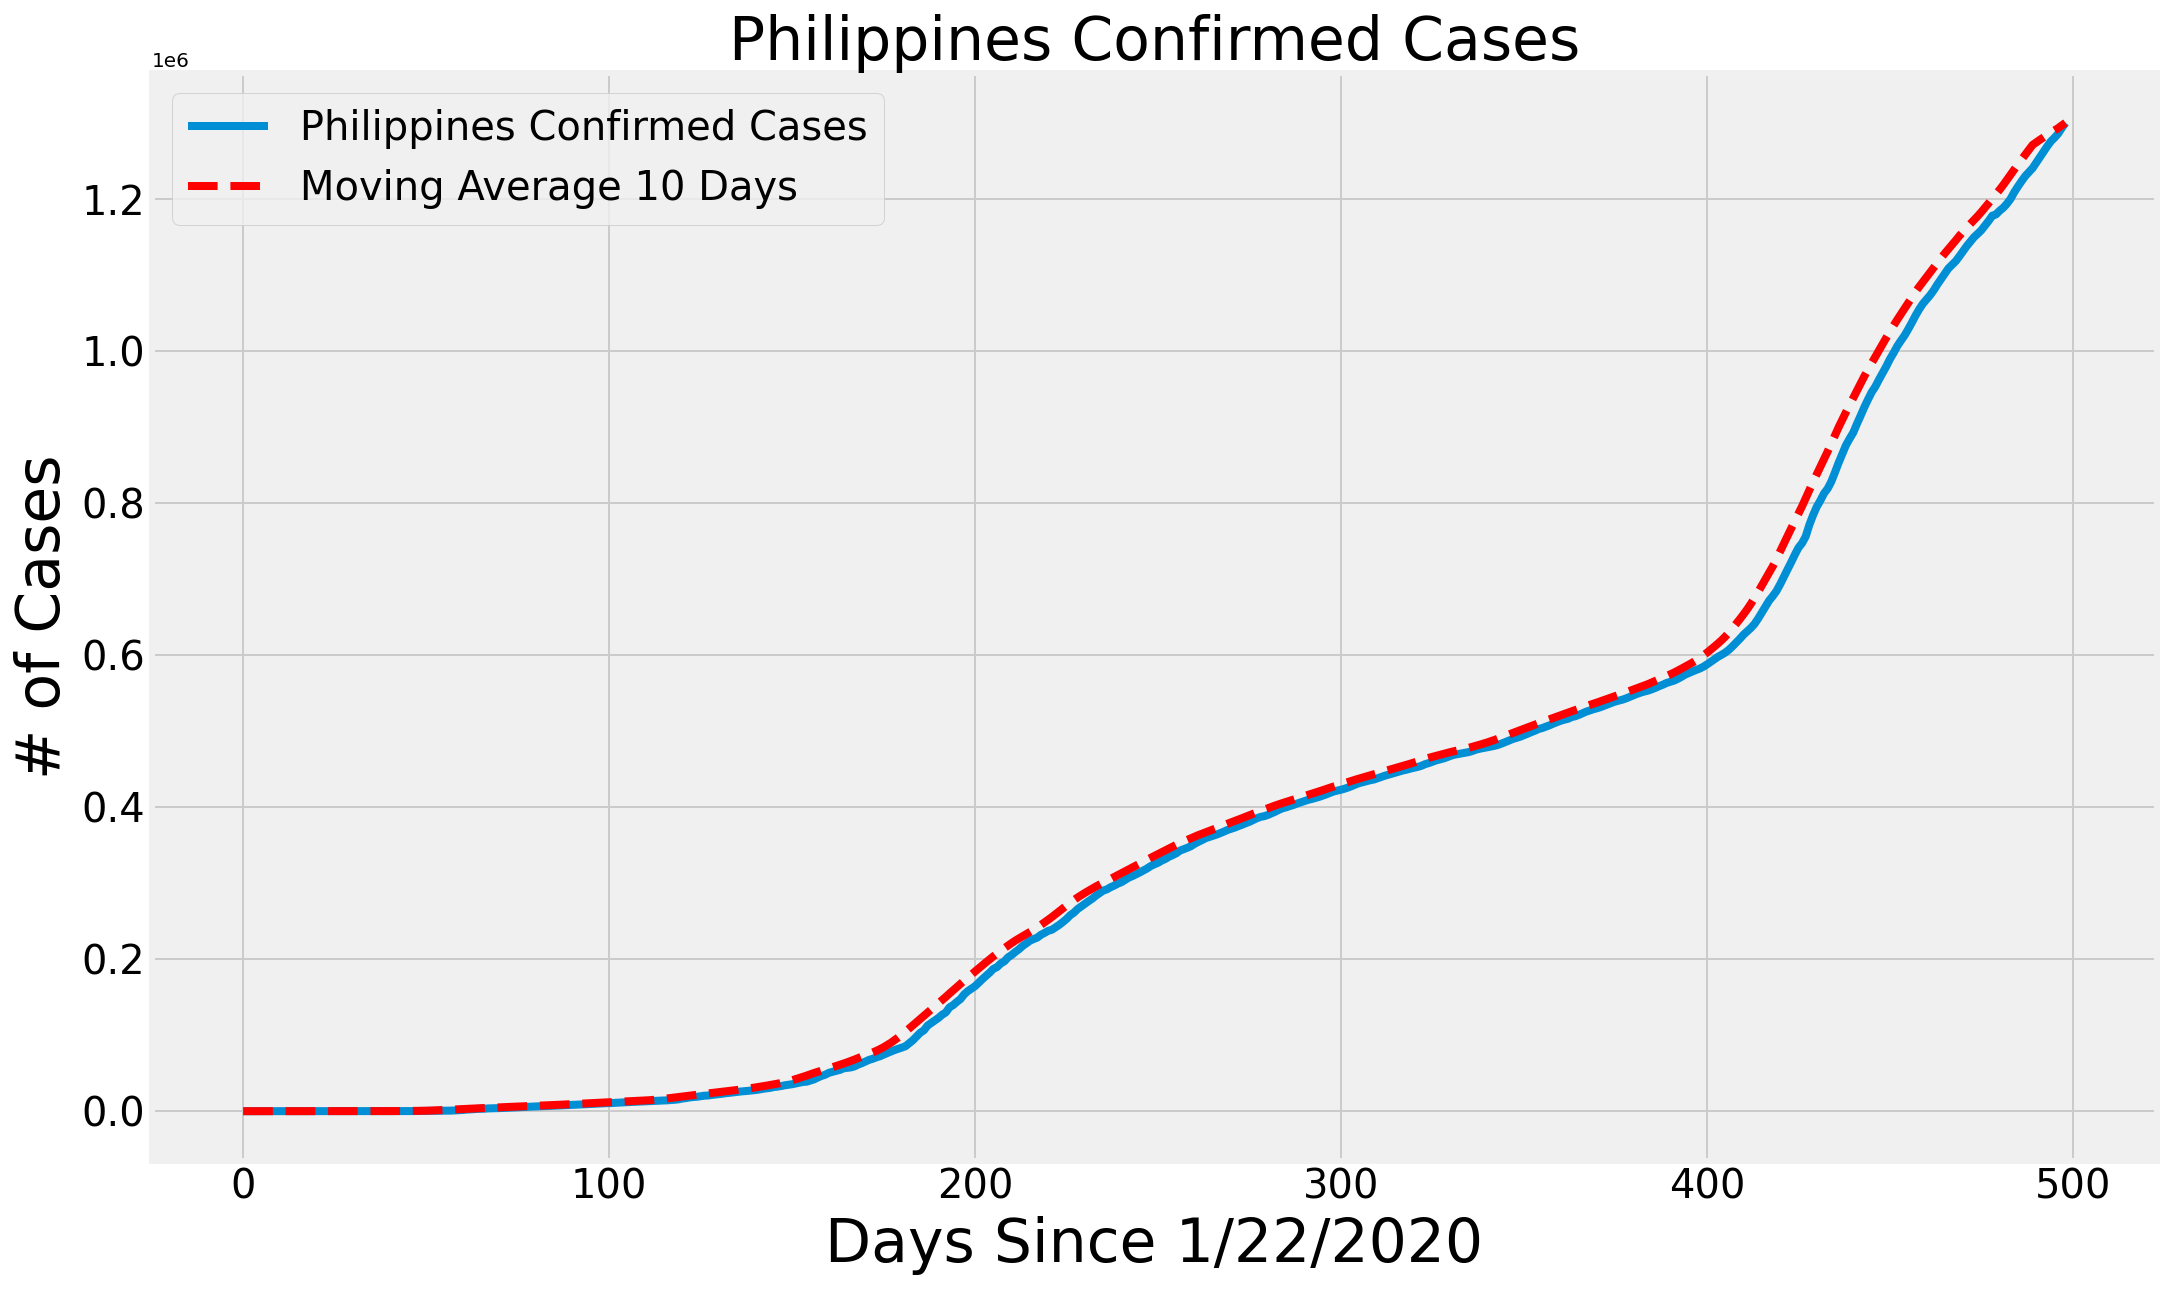

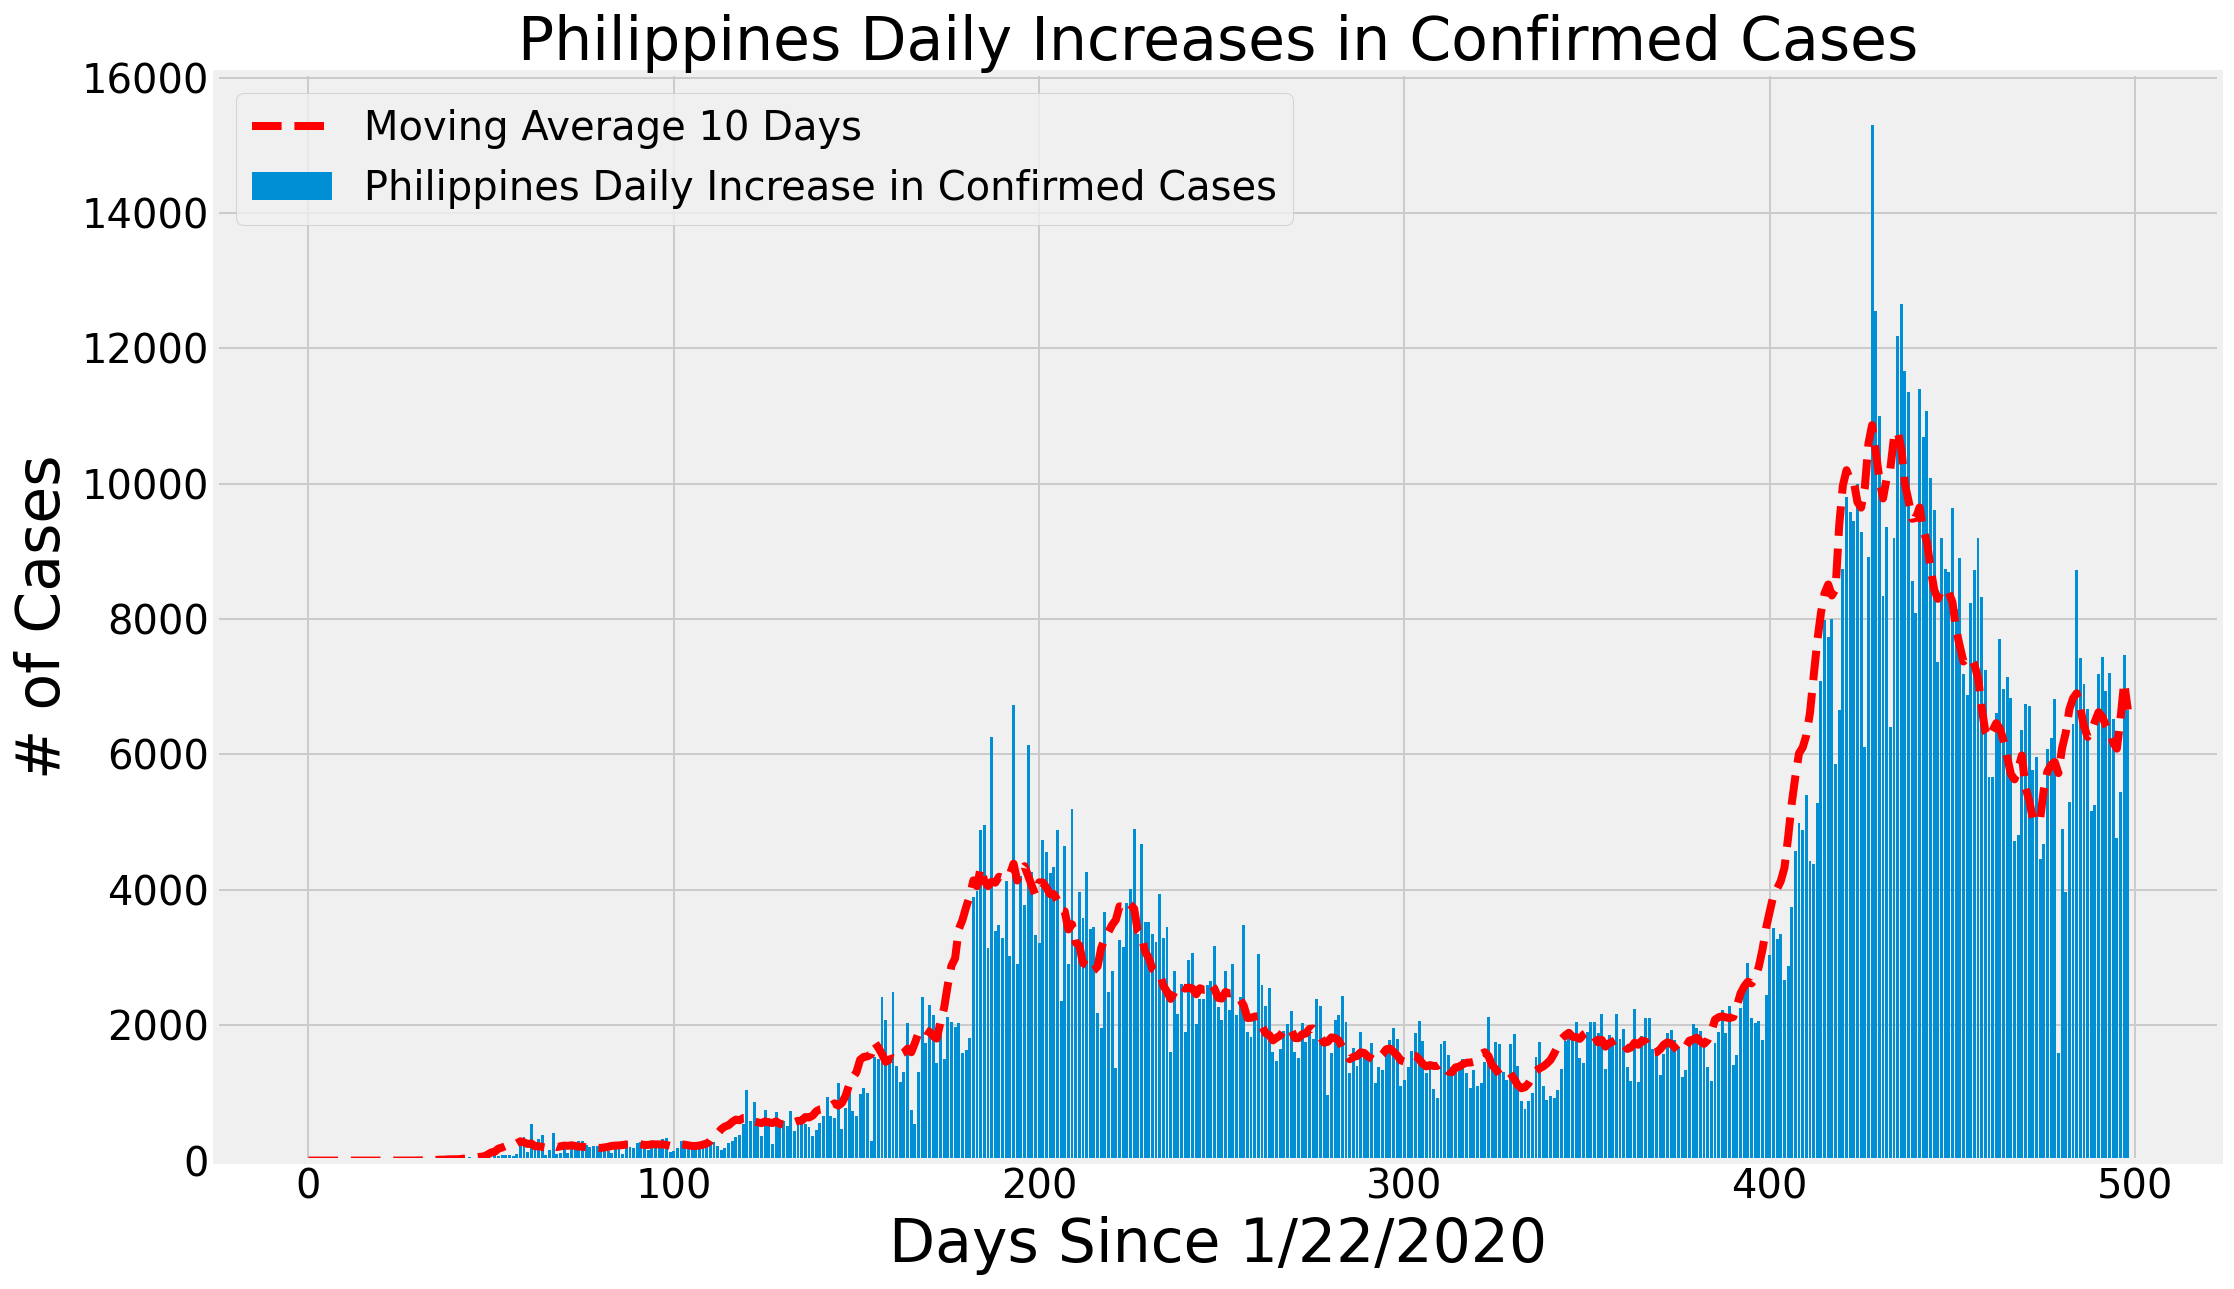

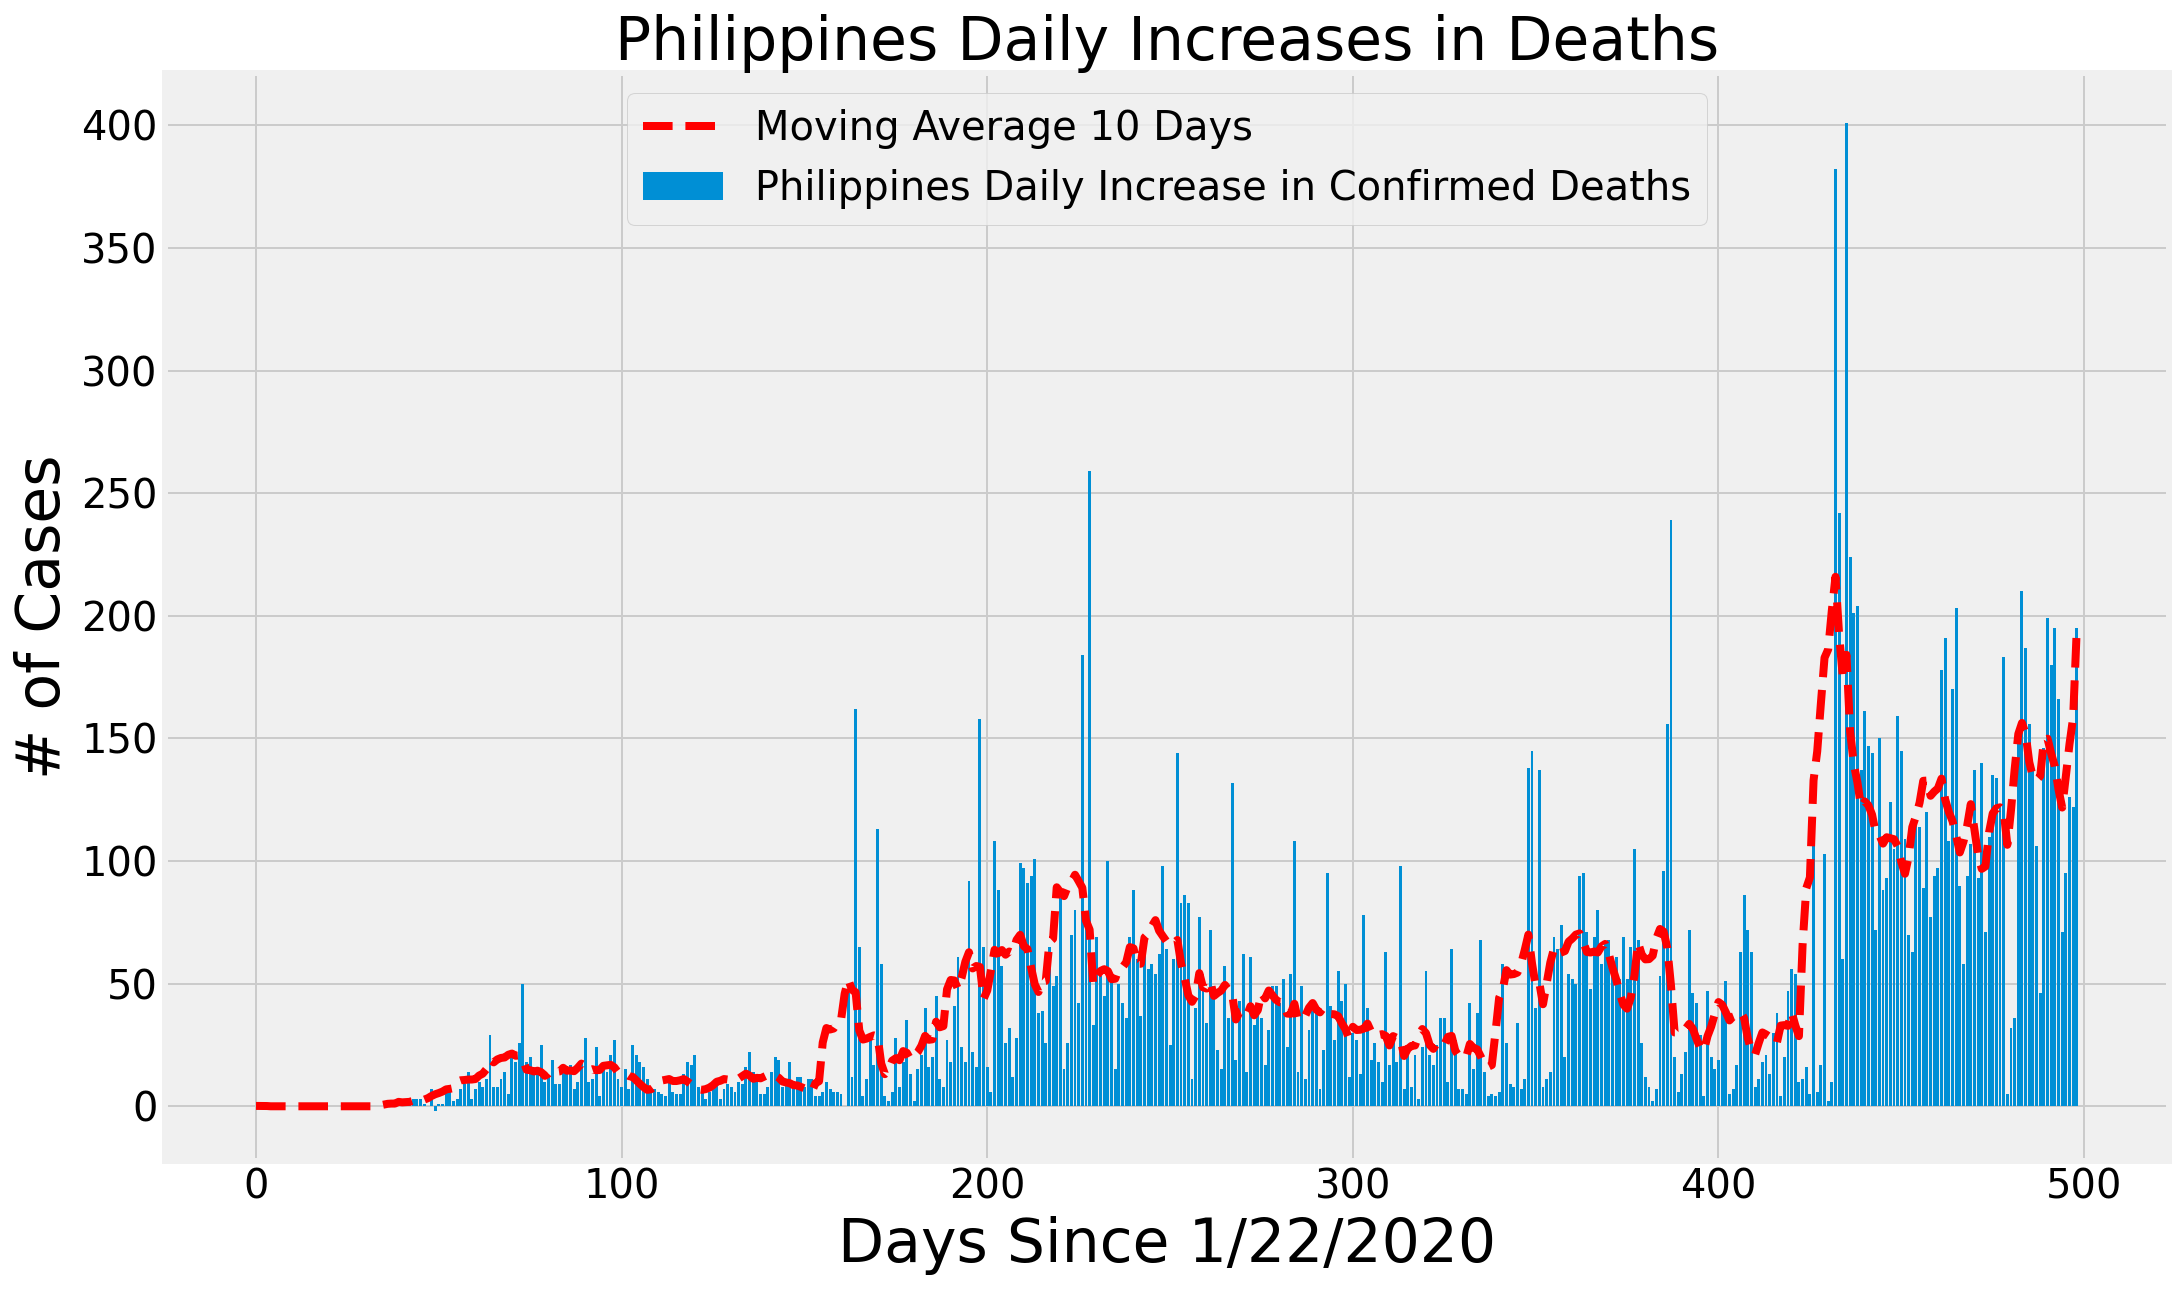

In [6]:
country_plot(adjusted_dates, df['total_cases'], df['new_cases'], df['new_deaths'], 'Philippines')

In [7]:
print( df.shape )
print( df.isnull().sum() )

(499, 62)
iso_code                        0
continent                       0
location                        0
total_cases                     0
new_cases                       0
                             ... 
human_development_index         0
excess_mortality              488
moving_average_new_cases        0
moving_average_new_deaths       0
moving_average_total_cases      0
Length: 62, dtype: int64


In [8]:
def add_test( dataset ):
    df_test = adfuller(dataset, autolag = 'AIC')
    print('1.) ADF :',df_test[0])
    print('2.) P-Value',df_test[1])
    print('3.) Num of Lags',df_test[2])
    print('4.) Num of obeservations used for ADF Regression and Critical Values Calculation : ',df_test[3])
    print('5.) Critical Values : ')
    for key,val in df_test[4].items():
        print('\t',key, " : ", val)
    

In [9]:
add_test(df[predicted_value])

1.) ADF : -1.896916356273398
2.) P-Value 0.33351314175350466
3.) Num of Lags 16
4.) Num of obeservations used for ADF Regression and Critical Values Calculation :  482
5.) Critical Values : 
	 1%  :  -3.4439899743408136
	 5%  :  -2.8675550551408353
	 10%  :  -2.569973792117904


In [10]:
stepwise_fit = auto_arima(df[predicted_value], trace = True, suppress_warnings= True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8106.021, Time=2.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8207.180, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8166.062, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8135.393, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8205.288, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8110.710, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8110.248, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8029.766, Time=2.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8077.387, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8081.413, Time=1.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8001.531, Time=1.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8093.289, Time=0.73 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8034.279, Time=1.62 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=8000.253, Time=1.95 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  499
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -3978.629
Date:                Sat, 26 Jun 2021   AIC                           7975.258
Time:                        18:16:18   BIC                           8013.153
Sample:                             0   HQIC                          7990.130
                                - 499                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2641      0.094      2.795      0.005       0.079       0.449
ar.L2         -0.4295      0.076     -5.648      0.000      -0.579      -0.280
ar.L3         -0.5445      0.053    -10.194      0.000      -0.649      -0.440
ar.L4         -0.1662      0.044     -3.767      0.000      -0.253      -0.080
ar.L5         -0.3593      0.038     -9.446      0.000      -0.434      -0.285
ma.L1         -0.8395      0.099     -8.472      0.000      -1.034      -0.645
ma.L2          0.5540      0.123      4.515      0.000       0.313       0.794
ma.L3          0.2141      0.091      2.363      0.018       0.036       0.392
sigma2      5.454e+05   1.71e+04     31.828      0.000    5.12e+05    5.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3917.61
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              16.63   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
print( 'Actual Data = ', df.shape )
train = df.iloc[:-50]
test = df.iloc[-50:]
print( 'Train =',train.shape )
print( 'Test = ',test.shape  )

Actual Data =  (499, 62)
Train = (449, 62)
Test =  (50, 62)


In [12]:
model = ARIMA(train[predicted_value], order=(5,1,3))
model = model.fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                  449
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -3546.087
Date:                Sat, 26 Jun 2021   AIC                           7110.174
Time:                        18:16:19   BIC                           7147.117
Sample:                    01-30-2020   HQIC                          7124.738
                         - 04-22-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2454      0.076      3.221      0.001       0.096       0.395
ar.L2         -0.4288      0.071     -6.059      0.000      -0.568      -0.290
ar.L3         -0.5845      0.049    -11.889      0.000      -0.681      -0.488
ar.L4         -0.1403      0.045     -3.142      0.002      -0.228      -0.053
ar.L5         -0.4060      0.042     -9.671      0.000      -0.488      -0.324
ma.L1         -0.8158      0.083     -9.848      0.000      -0.978      -0.653
ma.L2          0.5256      0.113      4.641      0.000       0.304       0.748
ma.L3          0.2315      0.085      2.713      0.007       0.064       0.399
sigma2       4.73e+05    1.6e+04     29.607      0.000    4.42e+05    5.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4213.76
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              35.28   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2021-04-23    11021.781379
2021-04-24    10991.650302
2021-04-25    10705.356683
2021-04-26     8633.046891
2021-04-27     8131.372770
2021-04-28     8142.981559
2021-04-29     9624.529950
2021-04-30    10683.305830
2021-05-01    11212.666115
2021-05-02    10224.664169
2021-05-03     8923.820632
2021-05-04     7968.901307
2021-05-05     8365.760214
2021-05-06     9556.651618
2021-05-07    10820.414512
2021-05-08    11049.968348
2021-05-09    10200.314858
2021-05-10     8826.566966
2021-05-11     8058.884928
2021-05-12     8410.944816
2021-05-13     9655.457438
2021-05-14    10796.223239
2021-05-15    11002.108279
2021-05-16    10098.327520
2021-05-17     8803.996361
2021-05-18     8088.336571
2021-05-19     8503.993567
2021-05-20     9712.591422
2021-05-21    10797.697790
2021-05-22    10928.617147
2021-05-23    10021.257287
2021-05-24     8769.947022
2021-05-25     8132.582349
2021-05-26     8584.209214
2021-05-27     9773.849968
2021-05-28    10788.536427
2021-05-29    10860.831837
2

<AxesSubplot:xlabel='date'>

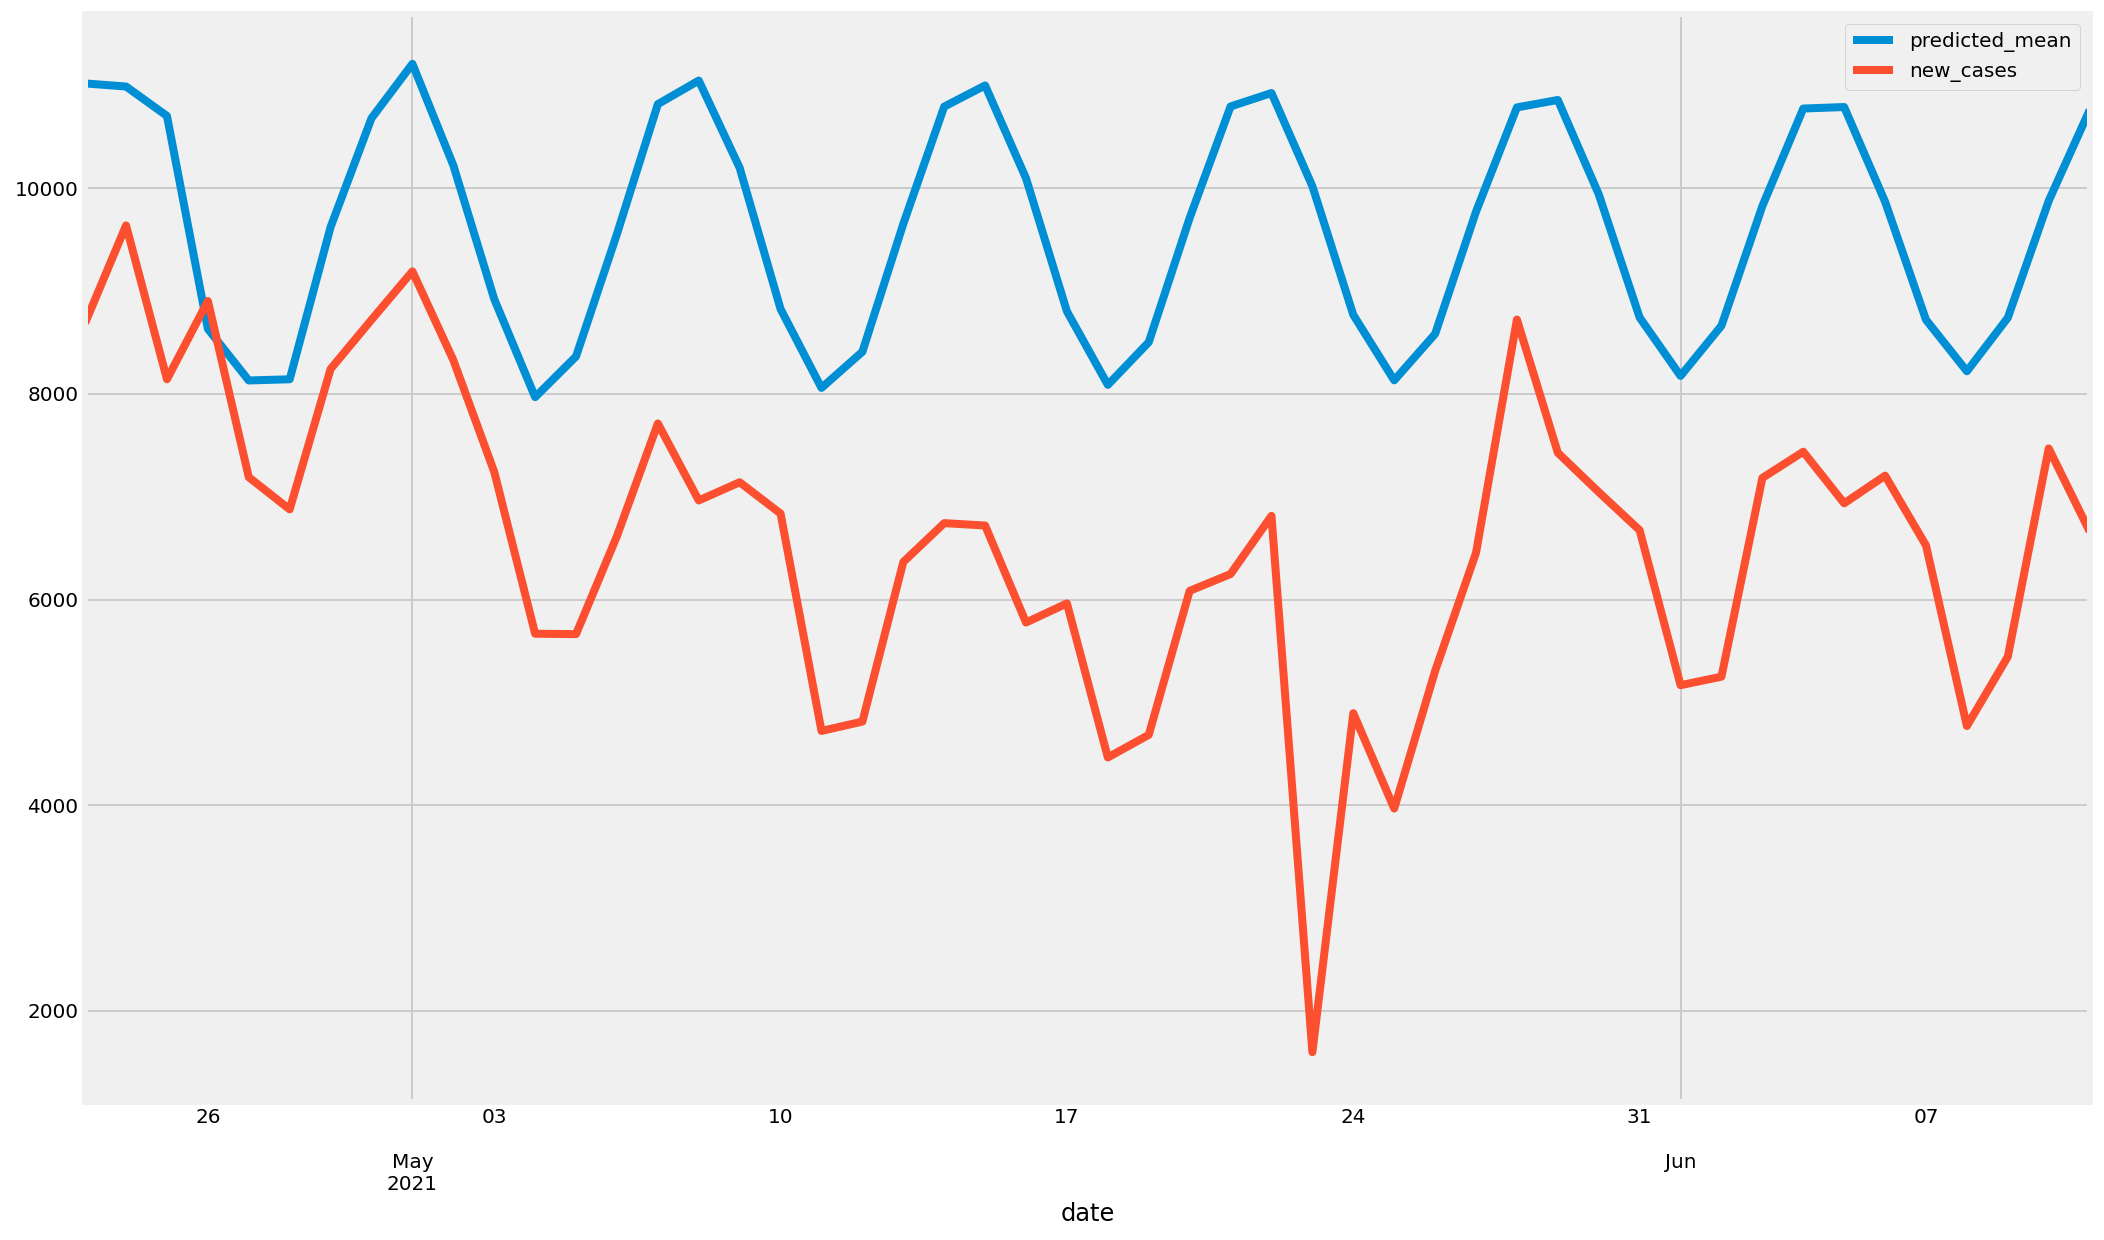

In [14]:
plt.figure(figsize=(16, 10))
pred.plot(legend=True)
test[predicted_value].plot(legend=True)

In [15]:
rmse= sqrt(mean_squared_error(pred, test[predicted_value] ) )
print( rmse )

3266.593733987776


In [16]:
model2 = ARIMA(df[predicted_value], order=(5,2,3) )
model2 = model2.fit()
df.tail(days_in_future)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,moving_average_new_cases,moving_average_new_deaths,moving_average_total_cases
date,,,,,,,,,,,,,,,,,,,,,
2021-06-02,PHL,Asia,Philippines,1240716.0,5249.0,6677.143,21158.0,146.0,141.286,11322.355,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6488.200000,149.500000,1.271273e+06
2021-06-03,PHL,Asia,Philippines,1247899.0,7183.0,6781.286,21357.0,199.0,139.714,11387.905,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6625.888889,149.888889,1.274669e+06
2021-06-04,PHL,Asia,Philippines,1255337.0,7438.0,6597.571,21537.0,180.0,138.714,11455.782,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6556.250000,143.750000,1.278015e+06
2021-06-05,PHL,Asia,Philippines,1262273.0,6936.0,6527.286,21732.0,195.0,144.286,11519.077,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6430.285714,138.571429,1.281254e+06
2021-06-06,PHL,Asia,Philippines,1269478.0,7205.0,6550.143,21898.0,166.0,148.286,11584.828,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6346.000000,129.166667,1.284418e+06
2021-06-07,PHL,Asia,Philippines,1276004.0,6526.0,6529.000,21969.0,71.0,143.286,11644.382,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6174.200000,121.800000,1.287406e+06
2021-06-08,PHL,Asia,Philippines,1280773.0,4769.0,6472.286,22064.0,95.0,150.286,11687.902,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6086.250000,134.500000,1.290256e+06
2021-06-09,PHL,Asia,Philippines,1286217.0,5444.0,6500.143,22190.0,126.0,147.429,11737.582,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,6525.333333,147.666667,1.293418e+06
2021-06-10,PHL,Asia,Philippines,1293687.0,7470.0,6541.143,22312.0,122.0,136.429,11805.751,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,7066.000000,158.500000,1.297018e+06


In [21]:
start = df.head(1).index[0].date().strftime('%Y-%m-%d') 
end = df.tail(1).index[0].date().strftime('%Y-%m-%d') 
index_future_dates = pd.date_range( start = start , end = end )
pred = model2.predict( start = len(df), end = len(df)+days_in_future, typ = 'levels').rename('ARIMA PREDICTIONS')


<AxesSubplot:xlabel='date'>

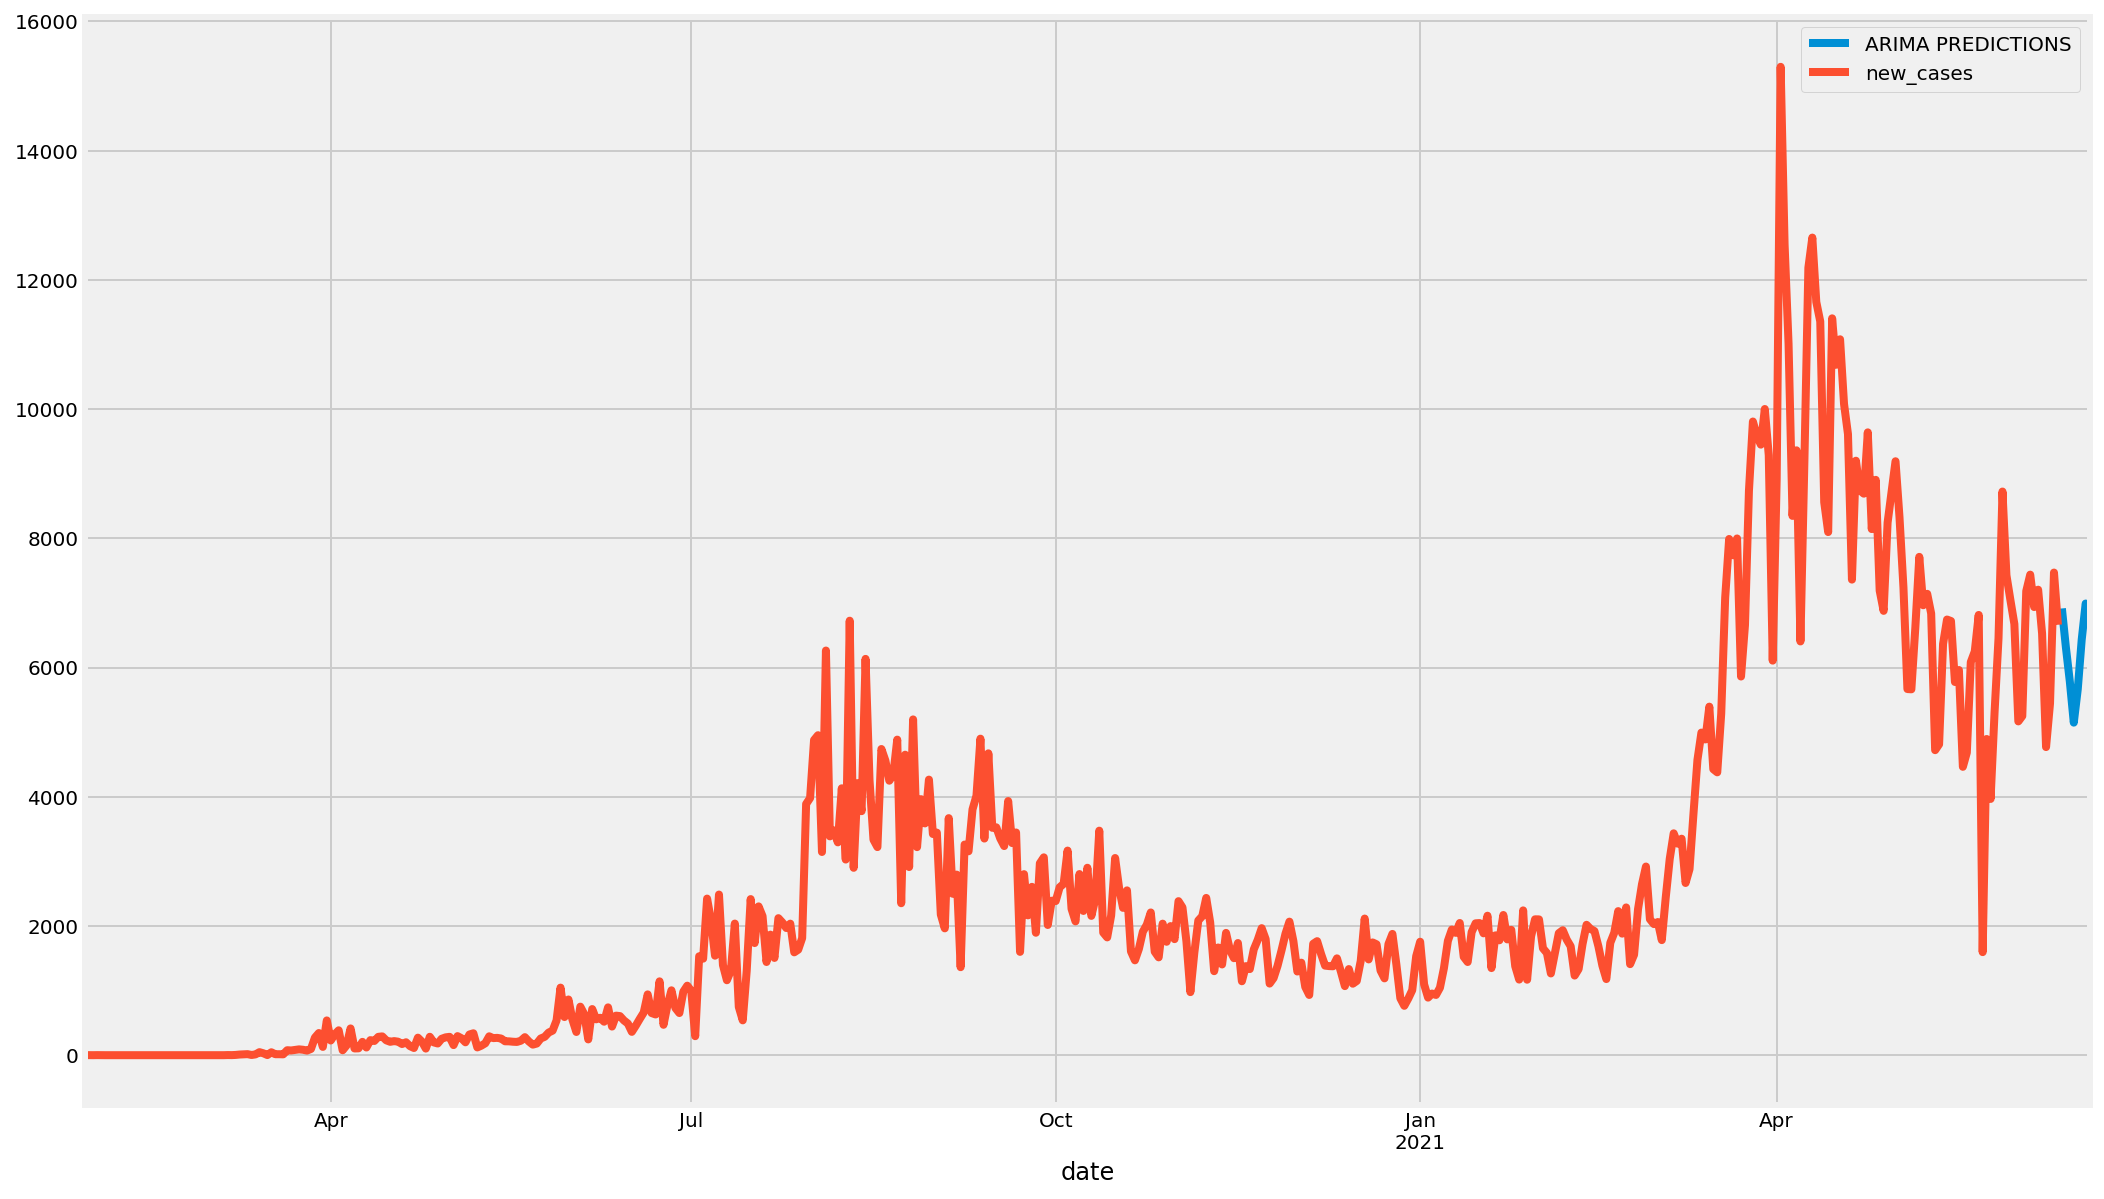

In [22]:
plt.figure(figsize=(16, 10))
pred.plot( legend=True)
df[predicted_value].plot(legend=True)